In [1]:

import json
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
import warnings

warnings.simplefilter('ignore')

sys.path.append('../utilities')
sys.path.append('../models/grt123')
sys.path.append('../models/grt123/training')
sys.path.append('../models/grt123/preprocessing/')

# from layers import nms,iou
from summit_utils import *
from evaluation import noduleCADEvaluation

workspace_path = Path(os.getcwd()).parent.parent

LUNA_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/seriesuids.csv')
LUNA_POSITIVE_ONLY_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/positive_only_seriesuids.csv')

LUNA_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations.csv')
LUNA_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_gt4.csv')

LUNA_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded.csv')
LUNA_EXCLUSIONS_PATH_EMPTY = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded_empty.csv')

LUNA_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations.csv')
LUNA_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_gt4.csv')

LUNA_GRT_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded.csv')
LUNA_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

SUMMIT_SERIES_PATH = Path(f'{workspace_path}/data/summit/metadata/seriesuids.csv')

SUMMIT_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations.csv')
SUMMIT_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations_gt4.csv')

SUMMIT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations.csv')
SUMMIT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations_gt4.csv')

SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')
SUMMIT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

def caluclate_cpm_from_bootstrapping(file_path):
    metrics = pd.read_csv(file_path)

    fps = metrics['FPrate']
    mean_sens = metrics['Sensivity[Mean]']
    low_mean_sens = metrics['Sensivity[Lower bound]']
    high_mean_sens = metrics['Sensivity[Upper bound]']

    idxs = []
    for fps_value in [0.125, 0.25, 0.5, 1, 2, 4, 8]:
        idxs.append(np.abs(fps - fps_value).argmin())
        
        

    fps = fps[idxs]
    mean_sens = mean_sens[idxs]
    low_sens = low_mean_sens[idxs]
    high_sens = high_mean_sens[idxs]

    
    df = pd.DataFrame({'fps': fps, 'mean_sens': mean_sens, 'low_sens': low_sens, 'high_sens': high_sens}).apply(lambda x: np.round(x,3))
    mean_cpm = df['mean_sens'].mean()
    low_cpm = df['low_sens'].mean()
    high_cpm = df['high_sens'].mean()

    display(df)
    print('Mean Sensitivity:', np.round(mean_cpm,2), 'Low Sensitivity:', np.round(low_cpm,2), 'High Sensitivity:', np.round(high_cpm,3))

def show_metrics(file_path):
    metrics = pd.read_csv(file_path, skiprows=6, sep=':').rename(columns={0:'Metric',1:'Value'}).round(3)
    display(metrics)

# GRT 123 - Trained LUNA Evaluated on LUNA

NOTE: As this is replicating SUMMIT training and evaluation of nodules >= 4mm only

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/LUNA/metadata/grt123_annotations_gt4.csv
Total number of included nodule annotations: 1137
Total number of nodule annotations: 1137
Cases: 888


100%|██████████| 1000/1000 [00:22<00:00, 44.68it/s]


,fps,mean_sens,low_sens,high_sens
0,0.125,0.401,0.349,0.460
159,0.250,0.553,0.513,0.595
476,0.500,0.682,0.649,0.718
1111,1.000,0.786,0.757,0.816
2381,2.000,0.875,0.853,0.897
4920,4.000,0.912,0.894,0.931
9999,8.000,0.942,0.929,0.955


Mean Sensitivity: 0.74 Low Sensitivity: 0.71 High Sensitivity: 0.767


,True positives,1091
0,False positives,16635.000
1,False negatives,46.000
2,True negatives,0.000
3,Total number of candidates,17739.000
4,Total number of nodules,1137.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,13.000
7,Sensitivity,0.960
8,Average number of candidates per scan,19.976


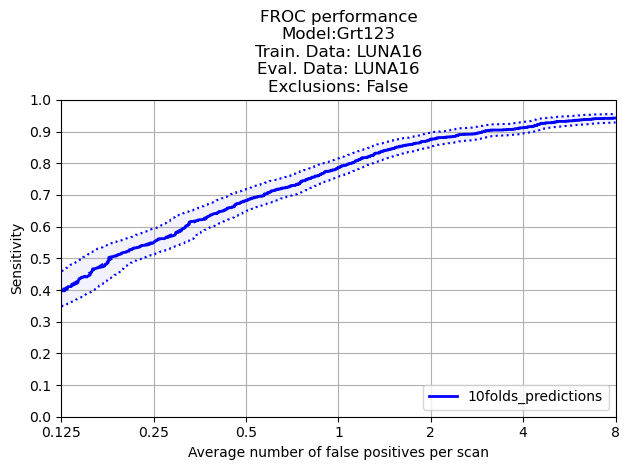

In [2]:
grt123_luna_luna = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/10folds/10folds_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16\nEval. Data: LUNA16\nExclusions: False',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions/froc_10folds_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/10folds_with_exclusions/CADAnalysis.txt')

# GRT 123 Trained LUNA Evaluated on SUMMIT

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/summit/metadata/grt123_annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797


100%|██████████| 1000/1000 [00:29<00:00, 33.60it/s]


,fps,mean_sens,low_sens,high_sens
0,0.125,0.078,0.054,0.107
159,0.250,0.154,0.120,0.195
476,0.500,0.287,0.243,0.333
1111,1.000,0.414,0.369,0.458
2381,2.000,0.529,0.492,0.566
4920,4.000,0.612,0.580,0.645
9999,8.000,0.673,0.642,0.706


Mean Sensitivity: 0.39 Low Sensitivity: 0.36 High Sensitivity: 0.43


,True positives,725
0,False positives,23065.000
1,False negatives,268.000
2,True negatives,0.000
3,Total number of candidates,23794.000
4,Total number of nodules,993.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,4.000
7,Sensitivity,0.730
8,Average number of candidates per scan,29.854


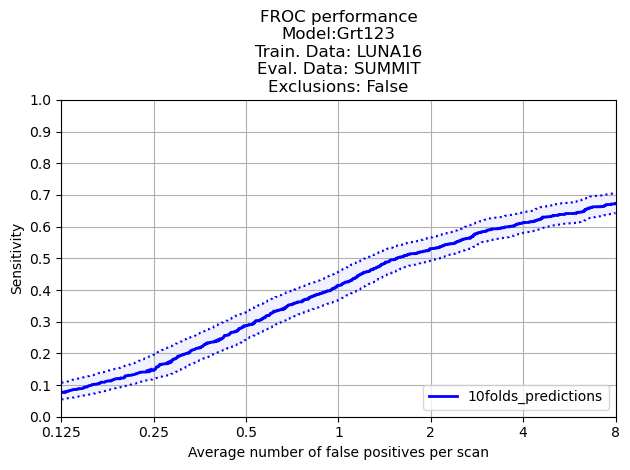

In [3]:
grt123_luna_summit = noduleCADEvaluation(
    annotations_filename=SUMMIT_GRT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=SUMMIT_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/summit/partial/10folds/10folds_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16\nEval. Data: SUMMIT\nExclusions: False',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds/froc_10folds_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/summit/partial/10folds/CADAnalysis.txt')

# Detection - Trained LUNA Evaluated LUNA

In [4]:
def combine_predictions(predictions_json_path, dataset_name, use_nms=True):
    """
    Get predictions from a json file

    Args:
    predictions_json_path: str, path to the json file

    Returns:
    images: list of str, list of image names
    predictions: pd.DataFrame, dataframe of predictions
    
    """
    predictions_json_path = Path(predictions_json_path)

    predictions_list = []

    for prediction_json_path in predictions_json_path.glob('*json'):
        
        print(prediction_json_path)

        with open(prediction_json_path,'r') as f:
            predictions_json = json.load(f)

        idx = 0
        for image_cnt, image in enumerate(predictions_json[dataset_name]):
            name = image['image'].split('/')[-1][:-7]
            
            image_predictions_dict = {}
            for box, score in zip(image['box'], image['score']):
                prediction = {}
                prediction['threshold'] = score
                prediction['index'] = box[2]
                prediction['col'] = box[1]
                prediction['row'] = box[0]
                prediction['diameter'] = np.max(box[3:])
                prediction['name'] = name

                image_predictions_dict[idx] = prediction
                idx+=1
            
            image_predictions = pd.DataFrame.from_dict(image_predictions_dict, orient='index')
            predictions_list.append(image_predictions)

    predictions = pd.concat(predictions_list, ignore_index=True)
    predictions.to_csv(predictions_json_path / 'predictions.csv', index=False)

    return predictions_json_path / 'predictions.csv'


/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold9.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold5.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold4.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold8.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold3.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold2.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/luna/10folds/result_fold1.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detec

100%|██████████| 1000/1000 [00:26<00:00, 38.38it/s]


,fps,mean_sens,low_sens,high_sens
0,0.125,0.488,0.425,0.541
159,0.250,0.611,0.572,0.653
476,0.500,0.754,0.719,0.788
1111,1.000,0.851,0.825,0.875
2381,2.000,0.919,0.900,0.935
4920,4.000,0.965,0.954,0.976
9999,8.000,0.979,0.969,0.987


Mean Sensitivity: 0.8 Low Sensitivity: 0.77 High Sensitivity: 0.822


,True positives,1126
0,False positives,17678.00
1,False negatives,11.00
2,True negatives,0.00
3,Total number of candidates,18870.00
4,Total number of nodules,1137.00
5,Ignored candidates on excluded nodules,0.00
6,Ignored candidates which were double detec...,66.00
7,Sensitivity,0.99
8,Average number of candidates per scan,21.25


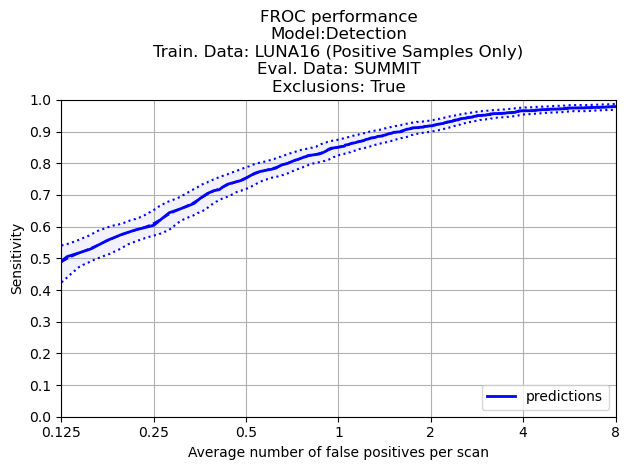

In [5]:

predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/10folds","validation")

detection_luna_luna = noduleCADEvaluation(
    annotations_filename=LUNA_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel:Detection\nTrain. Data: LUNA16 (Positive Samples Only)\nEval. Data: SUMMIT\nExclusions: True',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/10folds",
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/10folds/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/10folds/CADAnalysis.txt")

# Detection - Trained LUNA evaluated on SUMMIT

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../models/detection/result/trained_luna/summit/partial/10folds/result_10folds.json
/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/summit/metadata/annotations_gt4.csv
Total number of included nodule annotations: 993
Total number of nodule annotations: 993
Cases: 797
This is strange: CAD mark None detected two nodules! Check for overlapping nodule annotations, SeriesUID: summit-4336-nex_Y0_BASELINE_A, nodule Annot ID: None


100%|██████████| 1000/1000 [00:27<00:00, 35.74it/s]


,fps,mean_sens,low_sens,high_sens
0,0.125,0.145,0.110,0.191
159,0.250,0.252,0.211,0.305
476,0.500,0.380,0.336,0.427
1111,1.000,0.530,0.492,0.568
2381,2.000,0.660,0.624,0.693
4920,4.000,0.772,0.736,0.804
9999,8.000,0.856,0.829,0.881


Mean Sensitivity: 0.51 Low Sensitivity: 0.48 High Sensitivity: 0.553


,True positives,918
0,False positives,20162.000
1,False negatives,75.000
2,True negatives,0.000
3,Total number of candidates,21281.000
4,Total number of nodules,993.000
5,Ignored candidates on excluded nodules,0.000
6,Ignored candidates which were double detec...,202.000
7,Sensitivity,0.924
8,Average number of candidates per scan,26.701


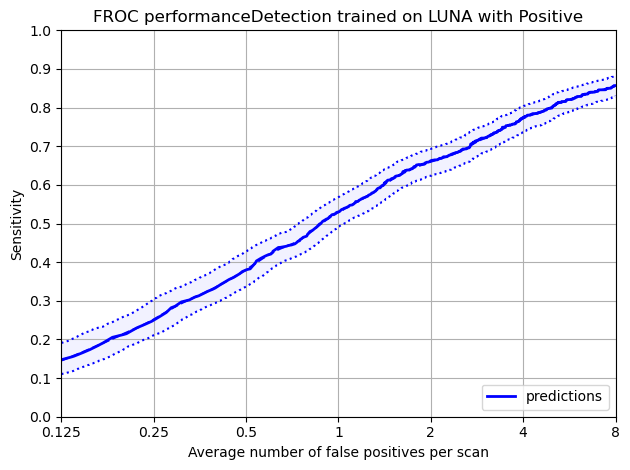

In [6]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/summit/partial/10folds","test")

detection_luna_summit = noduleCADEvaluation(
    annotations_filename=SUMMIT_GT4_ANNOTATIONS_PATH,
    annotations_excluded_filename=SUMMIT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=SUMMIT_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='Detection trained on LUNA with Positive',
    outputDir=f"{workspace_path}/results/detection/trained_luna/summit/10folds"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/summit/10folds/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/summit/10folds/CADAnalysis.txt")

# Miss Analysis at 2 FPPS



In [7]:
from tempfile import tempdir

def get_summit_missed_annotations(analysis_data, predictions_path, operating_point=2):
    fps = analysis_data[0]
    sens = analysis_data[1]
    threshold = analysis_data[2]

    operating_points = [0.125, 0.25, 0.5, 1, 2, 4, 8]

    idxs = []
    fps_values = []
    sens_values = []
    thresh_values = []
    for fpps in operating_points:

        idx = np.abs(fps - fpps).argmin()
        idxs.append(idx)
        fps_values.append(fps[idx])
        sens_values.append(sens[idx])
        thresh_values.append(threshold[idx])

    print('False Positives Operating Points:', operating_points)
    print('False Positives per Scan:', fps_values)
    print('Sensitivity:', sens_values)
    print('Threshold:', thresh_values)

    predictions = pd.read_csv(predictions_path)
    predictions_at_operating_point = predictions[predictions.threshold < thresh_values[operating_points.index(operating_point)]]

    with tempdir() as temp_dir:
        predictions_at_operating_point.to_csv(f'{temp_dir}/predictions.csv', index=False)
        missed_annotations = noduleCADEvaluation(
            annotations_filename=SUMMIT_GT4_ANNOTATIONS_PATH,
            annotations_excluded_filename=SUMMIT_EXCLUSIONS_EMPTY_PATH,
            seriesuids_filename=SUMMIT_SERIES_PATH,
            results_filename=f'{temp_dir}/predictions.csv',
            filter='Missed Annotations',
            outputDir=f'{temp_dir}/results'
        )

        misses = pd.read_csv(f'{temp_dir}/results/nodulesWithoutCandidate_predictions.csv').rename(columns={
            0 : 'name',
            1 : 'id',
            2 : 'row',
            3 : 'col',
            4 : 'index',
            5 : 'diameter'
        })

        test_annotations = (
            pd.read_csv('/Users/john/Projects/SOTAEvaluationNoduleDetection/metadata/summit/partial/test_metadata.csv')
            .assign(scan_id=lambda df: df.participant_id + '_Y0_BASELINE_A')
        )

        missed_metadata = pd.merge(misses, test_annotations, left_on=[
            'scan_id',
            'nodule_x_coordinate',
            'nodule_y_coordinate',
            'nodule_z_coordinate',
            'nodule_diameter_mm'
        ], right_on=[
            'name',
            'row',
            'col',
            'index',
            'diameter'
        ])

        print(f'Missed metadata:{missed_metadata.shape[0]}, Required misses: {misses.shape[0]}')

        return missed_metadata